In [94]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.7/dist-packages (2.1.3)
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)


In [143]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [144]:
df_places = gpd.read_file('/content/gdrive/MyDrive/unmazer/neighbourhoods.geojson')

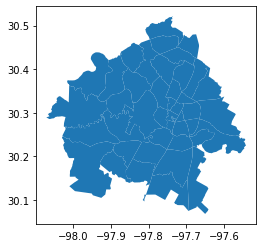

In [145]:
df_places.plot()

In [146]:
df_places

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ..."
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ..."
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ..."


In [147]:
df = pd.read_csv('/content/gdrive/MyDrive/unmazer/listings.csv')

In [148]:
df.shape[0]

10272

In [149]:
df = df.dropna(subset=['host_listings_count', 'neighbourhood_cleansed'])

In [150]:
df.shape[0]

10267

In [151]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [152]:
df['host_listings_count'].equals(df['host_total_listings_count'])

True

In [153]:
neighbourhood = df['neighbourhood_cleansed'].unique()
neighbourhood	

array([78702, 78704, 78729, 78759, 78741, 78703, 78757, 78731, 78758,
       78744, 78705, 78727, 78722, 78725, 78701, 78751, 78723, 78752,
       78736, 78732, 78746, 78745, 78754, 78730, 78724, 78753, 78756,
       78749, 78735, 78721, 78734, 78739, 78733, 78737, 78748, 78738,
       78726, 78717, 78750, 78728, 78712, 78742, 78747, 78719])

In [154]:
no_of_listings = []
for i in range(len(neighbourhood)):
  x = df.loc[df['neighbourhood_cleansed'] == neighbourhood[i], 'host_listings_count'].sum()
  no_of_listings.append(x)

no_of_listings

[41122.0,
 29065.0,
 21857.0,
 337.0,
 9364.0,
 4633.0,
 701.0,
 390.0,
 92770.0,
 358.0,
 8316.0,
 7130.0,
 11381.0,
 49.0,
 233609.0,
 45100.0,
 625.0,
 435.0,
 669.0,
 1315.0,
 34521.0,
 58931.0,
 13454.0,
 471.0,
 94.0,
 202.0,
 2129.0,
 187.0,
 42457.0,
 1597.0,
 5571.0,
 27.0,
 1525.0,
 1423.0,
 1274.0,
 1434.0,
 189.0,
 13418.0,
 125.0,
 148.0,
 2.0,
 25.0,
 70.0,
 488.0]

In [155]:
df['host_listings_count'].sum()


688988.0

In [156]:
sum(no_of_listings)

688988.0

In [157]:
neighbourhood	= list(map(str, neighbourhood))
neighbourhood

['78702',
 '78704',
 '78729',
 '78759',
 '78741',
 '78703',
 '78757',
 '78731',
 '78758',
 '78744',
 '78705',
 '78727',
 '78722',
 '78725',
 '78701',
 '78751',
 '78723',
 '78752',
 '78736',
 '78732',
 '78746',
 '78745',
 '78754',
 '78730',
 '78724',
 '78753',
 '78756',
 '78749',
 '78735',
 '78721',
 '78734',
 '78739',
 '78733',
 '78737',
 '78748',
 '78738',
 '78726',
 '78717',
 '78750',
 '78728',
 '78712',
 '78742',
 '78747',
 '78719']

In [158]:
df1 = pd.DataFrame()
df1['neighbourhood'] = neighbourhood
df1['listings'] = no_of_listings
df1

,neighbourhood,listings
0,78702,41122.0
1,78704,29065.0
2,78729,21857.0
3,78759,337.0
4,78741,9364.0
5,78703,4633.0
6,78757,701.0
7,78731,390.0
8,78758,92770.0
9,78744,358.0


In [159]:
result = pd.merge(df_places, df1, on="neighbourhood")
result

,neighbourhood,neighbourhood_group,geometry,listings
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",27.0
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",13454.0
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",1315.0
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",1423.0
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",2129.0
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ...",70.0
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",45100.0
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ...",2.0
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ...",1434.0
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ...",49.0


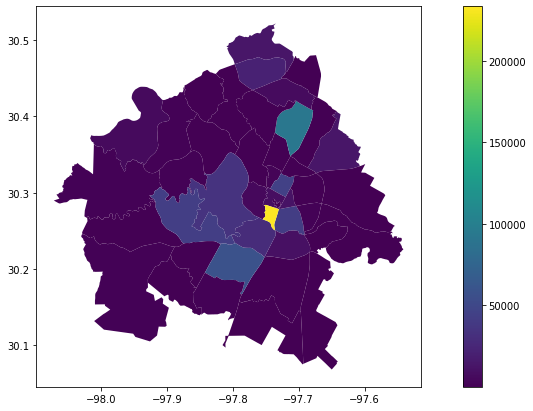

In [160]:
result.plot(column='listings', legend=True, figsize=(15, 7))

In [161]:
plt.savefig('/content/gdrive/MyDrive/unmazer/plot.png')

<Figure size 432x288 with 0 Axes>

In [164]:
hostname = df['host_name'].unique()
len(hostname)

2710

In [165]:
host_list = []
for i in range(len(hostname)):
  x = df.loc[df['host_name'] == hostname[i], 'host_listings_count'].sum()
  host_list.append(x)

host_list

[9.0,
 53.0,
 3.0,
 59.0,
 21.0,
 29.0,
 13.0,
 114.0,
 34.0,
 158.0,
 295.0,
 1.0,
 37.0,
 7.0,
 4.0,
 4.0,
 36.0,
 5.0,
 6.0,
 1.0,
 144.0,
 16.0,
 7.0,
 1.0,
 7.0,
 4.0,
 24.0,
 2.0,
 33.0,
 104.0,
 1.0,
 25.0,
 46.0,
 10.0,
 18.0,
 8.0,
 1.0,
 15.0,
 1.0,
 2.0,
 145.0,
 120.0,
 2.0,
 10.0,
 1.0,
 27.0,
 3.0,
 4.0,
 120.0,
 1.0,
 28.0,
 4.0,
 85.0,
 4.0,
 3.0,
 49.0,
 3103.0,
 17.0,
 1.0,
 1.0,
 3.0,
 16.0,
 81.0,
 12.0,
 74.0,
 26.0,
 1.0,
 7.0,
 1.0,
 1.0,
 9.0,
 12.0,
 1.0,
 188.0,
 17.0,
 6.0,
 10.0,
 5.0,
 518.0,
 56.0,
 4.0,
 401.0,
 46.0,
 18.0,
 5.0,
 547.0,
 49.0,
 20.0,
 2.0,
 178.0,
 23.0,
 94.0,
 18.0,
 498.0,
 0.0,
 1.0,
 37.0,
 2.0,
 1.0,
 20.0,
 34.0,
 5.0,
 1.0,
 2.0,
 3.0,
 32.0,
 6.0,
 2.0,
 14.0,
 1.0,
 1.0,
 256.0,
 2.0,
 4.0,
 2.0,
 4.0,
 12.0,
 9.0,
 1.0,
 2.0,
 4.0,
 5.0,
 17.0,
 26.0,
 6.0,
 1.0,
 5.0,
 6.0,
 1.0,
 57.0,
 219.0,
 1.0,
 29.0,
 3.0,
 4.0,
 1.0,
 4.0,
 11.0,
 6.0,
 3.0,
 4.0,
 79.0,
 99.0,
 10.0,
 3.0,
 30.0,
 1.0,
 2833.0,
 71.0,
 25.0,
 111.0,

In [166]:
df2 = pd.DataFrame()
df2['hostname'] = hostname
df2['listings'] = host_list
df2

,hostname,listings
0,Paddy,9.0
1,Sylvia,53.0
2,Peggy,3.0
3,Elizabeth,59.0
4,Todd,21.0
...,...,...
2705,Bungalow,148.0
2706,Michael And Helen,1.0
2707,Evonify,47.0
2708,Gayanne,0.0


In [168]:
df2 = df2.sort_values(by='listings', ascending=False)
df2.head(10)

,hostname,listings
2530,Kia,341378.0
921,Christian,123896.0
1951,WanderJaunt,58164.0
941,Jan,43849.0
1517,Evolve Vacation Rental,17974.0
1292,TurnKey Vacation Rentals,16653.0
1933,Brooke,9797.0
2687,Team Gospodin,7235.0
665,Martin,6259.0
1653,Sharebnb,3968.0


In [169]:
df2.describe()

,listings
count,2710.000000
mean,254.239114
std,7134.483253
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,341378.000000
